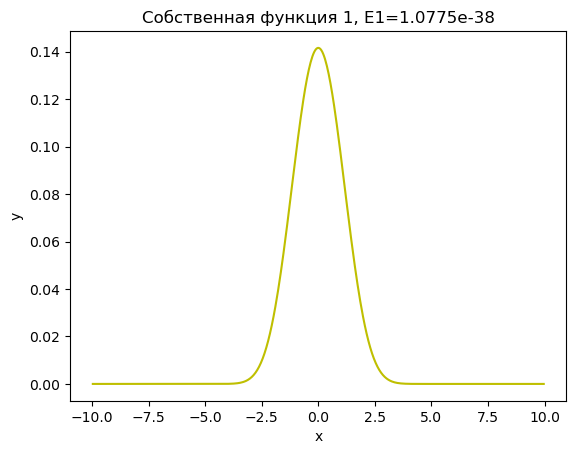

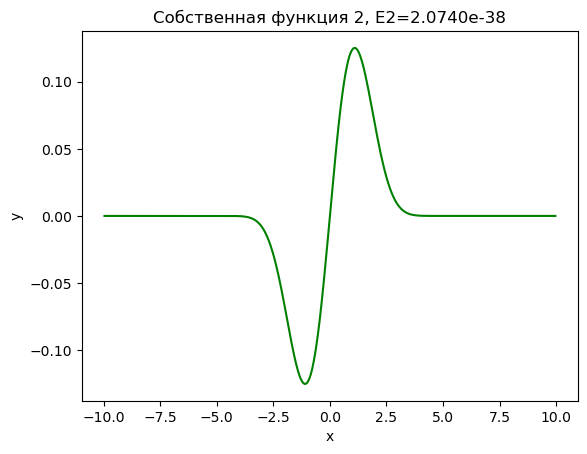

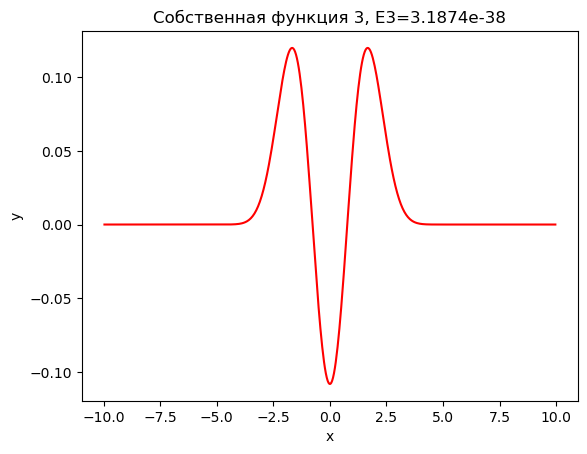

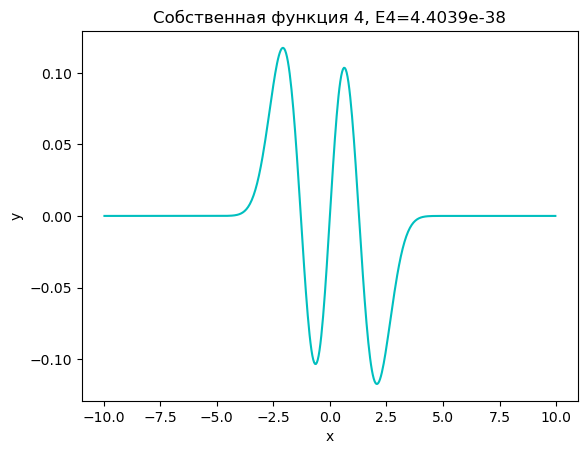

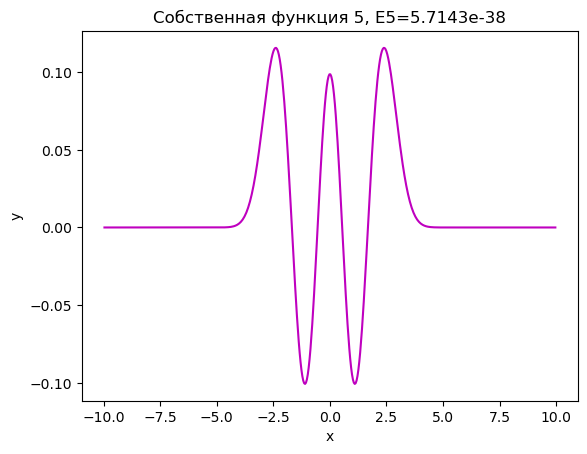

In [29]:
import numpy as np
from scipy.linalg import eig
from scipy.constants import hbar, electron_mass
import matplotlib.pyplot as plt

m = electron_mass


coef1 = 2*m/hbar**2
coef2 = hbar**2/(2*m)

neigen = 5

V = hbar**2/(2*m)
def q(x):
    return coef1 * V * np.cosh(x)


b = 10
a = -b
N = 500
h = 2 * b / (N+1)

A = np.zeros((N,N))
for i in range(N):
    A[i,i] = 2/h**2 + q(a + (i+1)*h)
    if i > 0:
        A[i,i-1] = -1/h**2
    if i < N-1:
        A[i,i+1] = -1/h**2

A[0,0] = -1/h**2 + q(a)
A[0,1] = 2/h**2
A[0,2] = -1/h**2
A[N-1,N-1] = -1/h**2 + q(a)
A[N-1,N-2] = 2/h**2
A[N-1,N-3] = -1/h**2

eigenvalues, eigenvectors = eig(A)

idx = eigenvalues.argsort()
eigenvalues = eigenvalues[idx].real * coef2
eigenvectors = eigenvectors[:,idx]

eigenvalues = eigenvalues[:neigen]
eigenvectors = eigenvectors[:,:neigen]

for i in range(neigen):
    eigenvectors[:,i] /= np.sqrt(np.sum(eigenvectors[:,i]**2))

x = np.linspace(a, b, N+2)
colors = ['y', 'g', 'r', 'c', 'm']
for i in range(neigen):
    plt.figure()
    plt.plot(x[1:-1], eigenvectors[:,i], color=colors[i % len(colors)])
    plt.title(f'Собственная функция {i+1}, E{i+1}={eigenvalues[i]:.4e}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()